In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# creating the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer


In [44]:
data = pd.read_csv("insurance.csv.csv")

In [45]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA 

In [47]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


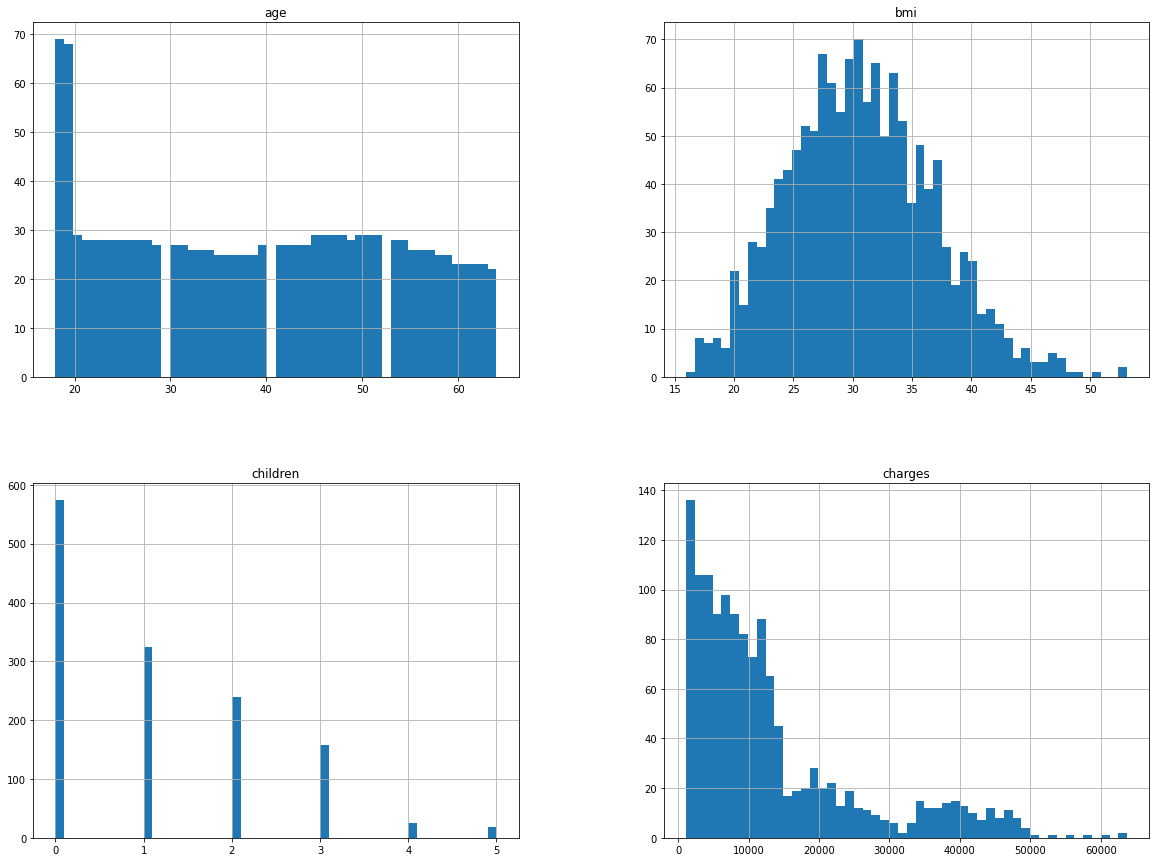

In [48]:
data.hist(bins=50, figsize=(20,15))
plt.show()

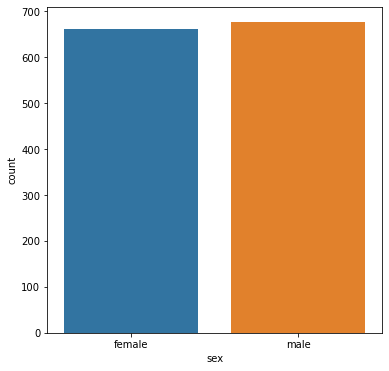

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(data['sex'])
plt.show()

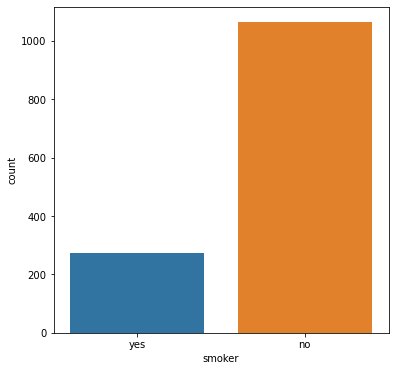

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(data['smoker'])
plt.show()

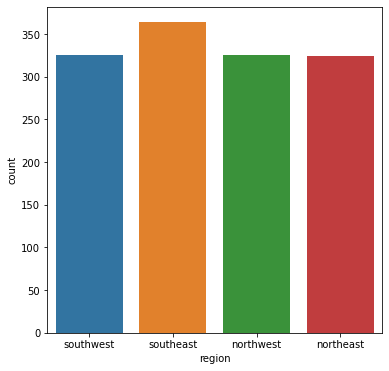

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(data['region'])
plt.show()

In [52]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# converting categorical data into numerical data

In [53]:
data['sex'] = data['sex'].map({'female':0, 'male':1})
data['smoker'] = data['smoker'].map({'yes':1, 'no': 0})
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [54]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [55]:
features = data.select_dtypes(include=[np.number])
features.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
# checking if any null values in  the data set
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [58]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


<AxesSubplot:>

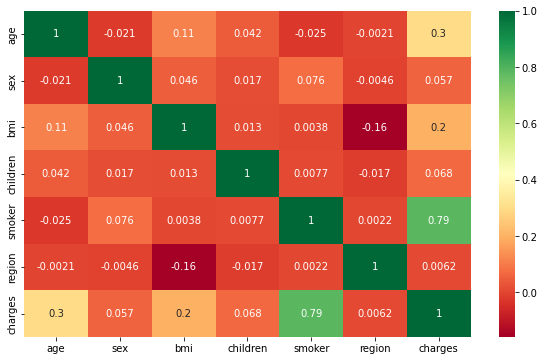

In [59]:
corrmat = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

# Splitting The data

In [60]:
# so the data set is good lets train and test the data
x = data.drop(['charges'], axis=1)
y = data['charges']

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [62]:
lr = LinearRegression()
lr.fit(x_train, y_train)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
from sklearn import metrics
pred_lr = lr.predict(x_test)
ev_lr = metrics.r2_score(y_test, pred_lr)
pred_rf = rf.predict(x_test)
ev_rf = metrics.r2_score(y_test, pred_rf)

In [64]:
from sklearn import metrics
print("mean absolute error:", metrics.mean_absolute_error(y_test,pred_lr))
print("mean squared error:", metrics.mean_squared_error(y_test, pred_lr))
print("root mean squared error:", np.sqrt(metrics.mean_absolute_error(y_test, pred_lr)))

mean absolute error: 4497.308017603773
mean squared error: 41572478.279368766
root mean squared error: 67.06197147119799


In [65]:
from sklearn import metrics
print("mean absolute error:", metrics.mean_absolute_error(y_test,pred_rf))
print("mean squared error:", metrics.mean_squared_error(y_test, pred_rf))
print("root mean squared error:", np.sqrt(metrics.mean_absolute_error(y_test, pred_rf)))

mean absolute error: 2961.307734197184
mean squared error: 27706123.715279497
root mean squared error: 54.41789902410037


In [66]:
print("r2_score for lr", ev_lr)
print("r2_score for rf",ev_rf)

r2_score for lr 0.744790960435662
r2_score for rf 0.8299150419681313


# Evaluation using the cross-validation

In [67]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [68]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lr, x_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5899.41109504 6048.63013043 5510.57774483 6445.69709314 7173.67458203
 5500.55748725 6640.36053795 5623.1737606  5529.56343349 5396.912954  ]
Mean: 5976.855881875832
Standard deviation: 566.5108637544427


In [69]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(rf, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4456.93773855 4699.7721469  4800.64438526 5168.05627252 5633.51485944
 4860.66912087 5697.45616112 4766.30977379 4135.53607075 3939.69996613]
Mean: 4815.859649533182
Standard deviation: 542.8910300463812


# Fine Tuning model

In [70]:
#fine-tunning my model
from sklearn.model_selection import GridSearchCV

param_grid = [
   
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rf_1= RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_1, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.14484317, 0.00754888, 0.18745151, 0.02138875, 0.62143937,
       0.01732832])

In [74]:
rf_1.fit(x_train,y_train)
pred_rf_1 = rf_1.predict(x_test)

In [75]:
ev_rf_1 = metrics.r2_score(y_test, pred_rf_1)

In [76]:
ev_rf_1

0.8323830810830263

# Pipeline

In [77]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe_lr = Pipeline([("scaler", StandardScaler()), ("LR", LinearRegression())])
pipe_rf = Pipeline([("scaler1", StandardScaler()), ("RF", RandomForestRegressor())])
pipe_svr = Pipeline([("scaler2",StandardScaler()), ("svm", SVR())])
pipe_tree = Pipeline([("scaler3", StandardScaler()), ("tree", DecisionTreeRegressor())])

In [78]:
pipe_lr.fit(x_train, y_train)
pipe_rf.fit(x_train,y_train)
pipe_svr.fit(x_train,y_train)
pipe_tree.fit(x_train,y_train)

Pipeline(steps=[('scaler3', StandardScaler()),
                ('tree', DecisionTreeRegressor())])

In [79]:
print("Test score: {:.2f}".format(pipe_lr.score(x_test, y_test)))
print("Test score: {:.2f}".format(pipe_rf.score(x_test, y_test)))
print("Test score: {:.2f}".format(pipe_svr.score(x_test, y_test)))
print("Test score: {:.2f}".format(pipe_tree.score(x_test, y_test)))

Test score: 0.74
Test score: 0.83
Test score: -0.18
Test score: 0.68


In [80]:
pipelines = [pipe_lr,pipe_rf,pipe_svr,pipe_tree]

In [81]:
best_accuracy = 0.0
best_regressor=0
best_pipeline=""

In [82]:
pipe_dict = {0: "linear regresion", 1:"RandomForestRegressor", 2: "SVR", 3:"decisiontreeregressor"}
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [83]:
for i,model in enumerate(pipelines):
    print("{} test accuracy {}".format(pipe_dict[i],model.score(x_test, y_test)))

linear regresion test accuracy 0.744790960435662
RandomForestRegressor test accuracy 0.8327797972208714
SVR test accuracy -0.17838335935454586
decisiontreeregressor test accuracy 0.6877162412848177


In [84]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline = model
        best_regressor = i
print("Regressor with Best Accuracy:{}".format(pipe_dict[best_regressor]))

Regressor with Best Accuracy:RandomForestRegressor
